# CONTENT BASED RECOMMENDATION SYSTEM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
# DATA LOADING
movies = pd.read_csv('data/movie.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# DATA PREPROCESSING

def extract_title(title):
   year = title[len(title)-5:len(title)-1]
   if year.isnumeric():
      title_no_year = title[:len(title)-7]
      return title_no_year
   else:
      return title
   
def extract_year(title):
   year = title[len(title)-5:len(title)-1]
   if year.isnumeric():
      return int(year)
   else:
      return np.nan
   
# rename before any transformation
movies.rename(columns={'title':'title_year'}, inplace=True) 

# remove whitespaces
movies['title_year'] = movies['title_year'].apply(lambda x: x.strip()) 

# create the columns for title and year
movies['title'] = movies['title_year'].apply(extract_title) 
movies['year'] = movies['title_year'].apply(extract_year) 

# changing names
movies['genres'] = movies['genres'].str.replace('Sci-Fi','SciFi')
movies['genres'] = movies['genres'].str.replace('Film-Noir','Noir')

In [5]:
r,c = movies[movies['genres']=='(no genres listed)'].shape
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 246


In [6]:
# Dropping movies without genres
movies = movies[~(movies['genres']=='(no genres listed)')].reset_index(drop=True)

In [7]:
movies.head()

,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0


Text(0, 0.5, 'Counts')

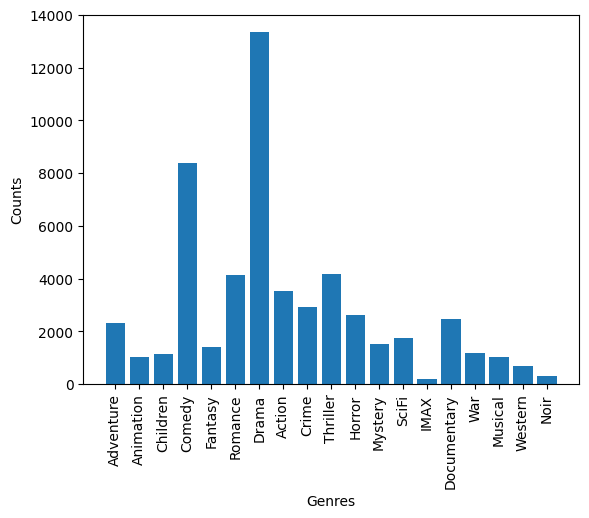

In [8]:
# GENRE FREQUENCY PLOT
movies['genres'] = movies['genres'].str.replace('|',' ')

counts = dict()
for i in movies.index:
   for g in movies.loc[i,'genres'].split(' '):
      if g not in counts:
         counts[g] = 1
      else:
         counts[g] = counts[g] + 1
         
plt.bar(list(counts.keys()), counts.values())
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Counts')

In [9]:
# TERM FREQUENCY AND INVERSE DOCUMENT FREQUENCY (tf-idf)

tfidf_vector = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vector.fit_transform(movies['genres'])

In [10]:
print(list(enumerate(tfidf_vector.get_feature_names_out())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'horror'), (10, 'imax'), (11, 'musical'), (12, 'mystery'), (13, 'noir'), (14, 'romance'), (15, 'scifi'), (16, 'thriller'), (17, 'war'), (18, 'western')]


In [11]:
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 54160 stored elements and shape (27032, 19)>
  Coords	Values
  (0, 1)	0.4190593152859304
  (0, 2)	0.5184153567262332
  (0, 3)	0.5058584647541116
  (0, 4)	0.2637107911959773
  (0, 8)	0.4797902045956178
  (1, 1)	0.5151624863618841
  (1, 3)	0.6218673465643471
  (1, 8)	0.5898208337473846
  (2, 4)	0.6021908070104235
  (2, 14)	0.7983521979378118
  (3, 4)	0.54436445713673
  (3, 14)	0.721689132040851
  (3, 7)	0.4275887445903555
  (4, 4)	1.0
  (5, 0)	0.5761385298798839
  (5, 5)	0.6103345445144942
  (5, 16)	0.5436507501697492
  (6, 4)	0.6021908070104235
  (6, 14)	0.7983521979378118
  (7, 1)	0.6379451494411499
  (7, 3)	0.770081804943156
  (8, 0)	1.0
  (9, 1)	0.6369106215481511
  (9, 0)	0.5607149915794074
  (9, 16)	0.5290969272045084
  :	:
  (27019, 16)	0.5362259886575816
  (27019, 9)	0.6241240345448614
  (27020, 4)	0.6021908070104235
  (27020, 14)	0.7983521979378118
  (27021, 4)	1.0
  (27022, 4)	0.7864068892418712
  (27022, 7)	0.617708

In [12]:
# COSINE SIMILARITY

sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix) 
print("Shape: ", sim_matrix.shape)
print(sim_matrix)

Shape:  (27032, 27032)
[[1.         0.81345076 0.15880421 ... 0.26371079 0.41905932 0.53751436]
 [0.81345076 1.         0.         ... 0.         0.51516249 0.66078291]
 [0.15880421 0.         1.         ... 0.60219081 0.         0.        ]
 ...
 [0.26371079 0.         0.60219081 ... 1.         0.         0.        ]
 [0.41905932 0.51516249 0.         ... 0.         1.         0.55506459]
 [0.53751436 0.66078291 0.         ... 0.         0.55506459 1.        ]]


In [13]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [14]:
indices

title
Toy Story                                              0
Jumanji                                                1
Grumpier Old Men                                       2
Waiting to Exhale                                      3
Father of the Bride Part II                            4
                                                   ...  
Forklift Driver Klaus: The First Day on the Job    27027
Kein Bund für's Leben                              27028
Feuer, Eis & Dosenbier                             27029
The Pirates                                        27030
Innocence                                          27031
Length: 27032, dtype: int64

In [15]:
user_preferences = {
        'liked_movies': ['Four Rooms', 'Ace Ventura: When Nature Calls', 'Clueless'],
        'disliked_movies': [] # 'Richard III', 'Cry, the Beloved Country'
    }

In [16]:
indices['Richard III']

title
Richard III       40
Richard III     7226
Richard III    17775
dtype: int64

In [33]:
# Initialize similarity scores
combined_sim_scores = np.zeros(sim_matrix.shape[0])

# Process liked movies (positive influence)
liked_movies = user_preferences.get('liked_movies', [])
for movie in liked_movies:
    if movie in indices:
        idx = indices[movie]
        combined_sim_scores += sim_matrix[idx]

# Process disliked movies (negative influence)
disliked_movies = user_preferences.get('disliked_movies', [])
for movie in disliked_movies:
    if movie in indices:
        idx = indices[movie]
        combined_sim_scores -= sim_matrix[idx]

In [34]:
combined_sim_scores

array([1.70535164, 1.4853383 , 1.15880421, ..., 0.8659016 , 0.29731118,
       0.58544229], shape=(27032,))

In [35]:
# Normalize by number of rated movies
total_rated = len(liked_movies) + len(disliked_movies)
if total_rated > 0:
    combined_sim_scores /= total_rated


In [36]:
combined_sim_scores

array([0.34107033, 0.29706766, 0.23176084, ..., 0.17318032, 0.05946224,
       0.11708846], shape=(27032,))

In [37]:

# Get top recommendations
recommendations = []
sim_scores = list(enumerate(combined_sim_scores))
sim_scores.sort(key=lambda x: x[1], reverse=True)

In [38]:
sim_scores

[(5705, np.float64(0.3865108998680927)),
 (24303, np.float64(0.3865108998680927)),
 (25261, np.float64(0.3865108998680927)),
 (4211, np.float64(0.3746561609471815)),
 (16735, np.float64(0.3746561609471815)),
 (18537, np.float64(0.3746561609471815)),
 (255, np.float64(0.37143166164886887)),
 (25599, np.float64(0.37143166164886887)),
 (240, np.float64(0.35202308248261704)),
 (351, np.float64(0.35202308248261704)),
 (406, np.float64(0.35202308248261704)),
 (797, np.float64(0.35202308248261704)),
 (822, np.float64(0.35202308248261704)),
 (1643, np.float64(0.35202308248261704)),
 (1930, np.float64(0.35202308248261704)),
 (1931, np.float64(0.35202308248261704)),
 (2040, np.float64(0.35202308248261704)),
 (2999, np.float64(0.35202308248261704)),
 (3070, np.float64(0.35202308248261704)),
 (3894, np.float64(0.35202308248261704)),
 (5361, np.float64(0.35202308248261704)),
 (5891, np.float64(0.35202308248261704)),
 (6483, np.float64(0.35202308248261704)),
 (6824, np.float64(0.35202308248261704)),